# Pruebas para verificar las respuestas a las preguntas que sé hicieron  

El objetivo de estas pruebas es corroborar que las respuestas a las preguntas realizadas al asistente se respondieron correctamente o con los criterios esperados. 

- Azure Open AI
- Azure Search Service


In [1]:
import commons

In [2]:
commons.print_required_variables(False)

No variables to print


In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

with open('People_Argentina_2years.json') as archivo:
    datos = json.load(archivo)

expected_responses = []

for pregunta in datos['questions_answers']:
    expected_response = pregunta.get('expected_response', None)
    if expected_response:
        expected_responses.append(expected_response)

for response in expected_responses:
    print(response)

Estimado Fulanito Garza, una de las tantas ventajas de trabar en Baufest son las siguientes: BAU Dollar, donde recibes el beneficio del 20% de tu salario en dólares; BAU Health, reintegro del costo del gimnasio u otras actividades deportivas; BAU net, recibe una bonificación del costo del servicio de internet; BAU Lunch, Baufest te paga el lunch; BAU Home, se te reintegra el costo de la mudanza y Anti tráfico, tienes la posibilidad de ajustar tu horario laboral para evitar el tráfico.
Sí, pero se requiere que el rango de horario laboral se mantenga por un mes
Si, puedes presentar el contrato o escritura al nombre de otra persona, siempre que presentes un documento legal que respalde la convivencia, por ejemplo, como un certificado de concubinato, matrimonio o unión civil. Esto ayudará a garantizar que tu solicitud sea considerada de manera adecuada
A través de la App de Pedidos ya (Menú/PedidosYa Pagos) verás las acreditaciones que tenes disponible para usar
No la acreditación es seman

### Prueba con datos

In [4]:
user_question=f"""\
¿Cuales son los beneficios de trabajar en Baufest?"""
user_name="Santiago Vilchis"
user_seniority="2 años"
user_job="Desarrollador"
user_location="Argentina"

delimiter="####"
no_user_data_prefix="Estimado Baufesiano, para responder a su pregunta necesito la siguiente informacion"

user_message = f"""\
Sige los pasos que se indican a continuacion para responder a la pregunta delimitada por 4 hashtags: {delimiter}. \
Paso 1 : Si no dispone de los datos del colaborador, su respuesta debe seguir el siguiente formato: {no_user_data_prefix} \
enumera los datos que faltan y nada mas. \
Paso 2 : Si dispone de los datos del colaborador, utilice el nombre del colaborador en su respuesta. \
Paso 3 : Utilice las siguientes recomendaciones para su respuesta : \
Recomendación 1 : Utilice los datos del colaborador para filtrar la respuesta. \
Recomendación 2 : Muestre solo los resultados que tengan que ver con el pais de la unidad y la antiguedad en Baufest. \
Recomendación 3 : Si la respuesta es demasiado amplia, filtre la respuesta por el pais de la unidad y la antiguedad en Baufest. \
Recomendación 4 : Si la pregunta no es clara, pida mas detalles para responder. \
\

Datos del colaborador: \
Nombre : {user_name}. \
Antiguedad en Baufest : {user_seniority}. \
Puesto : {user_job}. \
Pais de la unidad : {user_location}. \
\
{delimiter}{user_question}{delimiter} \
"""
messages =  [  
{'role':'user', 
 'content': f"{user_message}"},  
] 

max_retries = 20
retry_count = 0

while retry_count < max_retries:
    try:
        response = commons.get_completion_from_messages(messages)
        respuestaOA = response
        print(response)
        break
    except InvalidRequestError as e:
        print("Caught InvalidRequestError:", e)
        retry_count += 1
        if retry_count == max_retries:
            print("Max retries reached. Unable to proceed.")
        else:
            time.sleep(1)  

Data source role information : Eres un asistente de recursos humanos. Tu respuesta debe ser en español y debe siempre empezar por 
estimado colaborador
messages : [
    {
        "role": "user",
        "content": "Sige los pasos que se indican a continuacion para responder a la pregunta delimitada por 4 hashtags: ####. Paso 1 : Si no dispone de los datos del colaborador, su respuesta debe seguir el siguiente formato: Estimado Baufesiano, para responder a su pregunta necesito la siguiente informacion enumera los datos que faltan y nada mas. Paso 2 : Si dispone de los datos del colaborador, utilice el nombre del colaborador en su respuesta. Paso 3 : Utilice las siguientes recomendaciones para su respuesta : Recomendaci\u00f3n 1 : Utilice los datos del colaborador para filtrar la respuesta. Recomendaci\u00f3n 2 : Muestre solo los resultados que tengan que ver con el pais de la unidad y la antiguedad en Baufest. Recomendaci\u00f3n 3 : Si la respuesta es demasiado amplia, filtre la respues

In [5]:
respuesta_comparar = "Las ventajas de trabajar en Baufest son las siguientes: BAU Dollar, posible 20% de salario en dólares; BAU Health, actividades deportivas; BAU net, pago internet; BAU Lunch, Baufest te paga el lunch; BAU Home, reintegro del costo de tu mudanza y Anti tráfico, ajustar el horario laboral."
print("Respuesta OpenAi")
print(respuestaOA)
print("Respuesta Esperada")
print(respuesta_comparar)

Respuesta OpenAi
Estimado Santiago Vilchis, los beneficios de trabajar en Baufest varían según el país de la unidad y la antigüedad en la empresa. En Argentina, algunos de los beneficios incluyen el programa de salud BAU Health, el programa de almuerzos BAU Lunch, el programa de internet BAU Net y el programa de dólares BAU Dollar. Además, como desarrollador, puedes acceder a programas de capacitación y desarrollo profesional. Si desea más detalles sobre los beneficios específicos disponibles para su antigüedad y posición, por favor proporcione más detalles.
Respuesta Esperada
Las ventajas de trabajar en Baufest son las siguientes: BAU Dollar, posible 20% de salario en dólares; BAU Health, actividades deportivas; BAU net, pago internet; BAU Lunch, Baufest te paga el lunch; BAU Home, reintegro del costo de tu mudanza y Anti tráfico, ajustar el horario laboral.


In [6]:
def calcular_similitud(respuestaOA, expected_responses, umbral_similitud):
    comparador = SequenceMatcher(None, respuestaOA, expected_responses)
    similitud = comparador.ratio()

    return similitud >= umbral_similitud

def respuestas_similares(respuestaOA, expected_responses, umbral_similitud=0.6):
    resultados = []

    for expected_response in expected_responses:
        similitud = calcular_similitud(respuestaOA, expected_response, umbral_similitud)
        
        resultado = {
            "robot_answer": respuestaOA,
            "expected_answer": expected_response,
            "SequenceMatcher_result": {
                "similar": int(similitud),
                "argument": umbral_similitud
            }
        }

        resultados.append(resultado)
        

    return resultados

resultados = respuestas_similares(respuestaOA, expected_responses)

with open("resultados.json", "w") as archivo_resultados:
    json.dump(resultados, archivo_resultados, indent=2)

print("Resultados guardados en 'resultados.json'")
print(resultados)

Resultados guardados en 'resultados.json'
[{'robot_answer': 'Estimado Santiago Vilchis, los beneficios de trabajar en Baufest varían según el país de la unidad y la antigüedad en la empresa. En Argentina, algunos de los beneficios incluyen el programa de salud BAU Health, el programa de almuerzos BAU Lunch, el programa de internet BAU Net y el programa de dólares BAU Dollar. Además, como desarrollador, puedes acceder a programas de capacitación y desarrollo profesional. Si desea más detalles sobre los beneficios específicos disponibles para su antigüedad y posición, por favor proporcione más detalles.', 'expected_answer': 'Estimado Fulanito Garza, una de las tantas ventajas de trabar en Baufest son las siguientes: BAU Dollar, donde recibes el beneficio del 20% de tu salario en dólares; BAU Health, reintegro del costo del gimnasio u otras actividades deportivas; BAU net, recibe una bonificación del costo del servicio de internet; BAU Lunch, Baufest te paga el lunch; BAU Home, se te rein

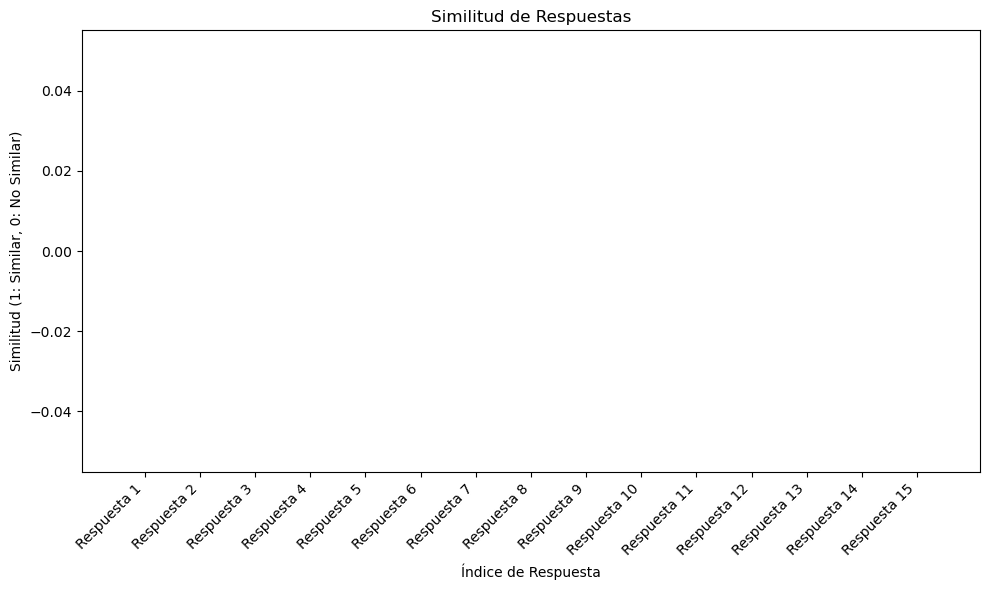

In [7]:
with open("resultados.json") as archivo_resultados:
    informacion = json.load(archivo_resultados)
    
df = pd.DataFrame(informacion)

num_respuestas = len(df)
etiquetas_respuestas = [f"Respuesta {i+1}" for i in range(num_respuestas)]

plt.figure(figsize=(10, 6))
plt.bar(df.index, df['SequenceMatcher_result'].apply(lambda x: x['similar']), color=['green' if sim == 1 else 'red' for sim in df['SequenceMatcher_result'].apply(lambda x: x['similar'])])
plt.title("Similitud de Respuestas")
plt.xlabel("Índice de Respuesta")
plt.ylabel("Similitud (1: Similar, 0: No Similar)")
plt.xticks(df.index, etiquetas_respuestas, rotation=45, ha="right")
plt.tight_layout()

plt.show()

NameError: name 'openai' is not defined